In [76]:
import tensorflow as tf

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Force TensorFlow to use GPU
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)



Num GPUs Available:  1


Step 1 import the first libraries i am needing to visualize my initial data.

In [77]:

import numpy as np

In [78]:
import pandas as pd

In [79]:
import seaborn as sns

In [80]:
import matplotlib.pyplot as plt

Step 2:**Loading The data that i put in my drive for colab and allowing
permission**

In [81]:
# Mount Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Specify the file paths for training and testing data
file_path = '/content/drive/My Drive/male_players (legacy).csv'
test_file_path = '/content/drive/My Drive/players_22.csv'

# Load the CSV files into DataFrames
data = pd.read_csv(file_path)
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the DataFrames to verify they loaded correctly
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-81-055191046b85>:10: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-81-055191046b85>:11: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_file_path)


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


Step 3:**Describing** deeply the data for deep **inference**


In [82]:
# Describe the data
print(data.describe())

           player_id   fifa_version  fifa_update        overall  \
count  161583.000000  161583.000000     161583.0  161583.000000   
mean   214484.722353      19.125514          2.0      65.699071   
std     34928.608856       2.559318          0.0       7.040855   
min         2.000000      15.000000          2.0      40.000000   
25%    199159.000000      17.000000          2.0      61.000000   
50%    220621.000000      19.000000          2.0      66.000000   
75%    236958.000000      21.000000          2.0      70.000000   
max    271817.000000      23.000000          2.0      94.000000   

           potential     value_eur       wage_eur            age  \
count  161583.000000  1.595300e+05  159822.000000  161583.000000   
mean       70.744008  2.326770e+06   10855.409768      25.123181   
std         6.259121  6.005746e+06   21941.656285       4.670207   
min        40.000000  1.000000e+03     500.000000      16.000000   
25%        66.000000  3.250000e+05    2000.000000      2

step4:Importing simpleImputer to learn the missing values and data before filling them by the median or mean strategy.



In [83]:
from sklearn.impute import SimpleImputer

In [84]:
# Check for missing values

print(data.isna().sum())


# Impute missing values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        imputer = SimpleImputer(strategy='median') if data[column].median() < data[column].mean() else SimpleImputer(strategy='mean')
        data[[column]] = imputer.fit_transform(data[[column]])


print(data.isna().sum())


player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64
player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64


step 5 checking the data if they are categorical we select them and put them in one variable and the same for the numerical because of good treatment of data

In [85]:
# Check categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(cat_cols)

# Check numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

Categorical columns:
Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'league_name', 'club_name', 'club_position',
       'club_loaned_from', 'club_joined_date', 'nationality_name',
       'nation_position', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'player_traits', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'gk', 'player_face_url'],
      dtype='object')


In [86]:
# Separate categorical and numerical data
categorical_data = data[cat_cols].copy()  # Use .copy() to avoid SettingWithCopyWarning
numerical_data = data[num_cols]

Step 6:Enconding already the categorical data that seems to be relevant for compatible treatment by our code in machine learning

In [87]:
# Encode categorical data
categorical_data_encoded = pd.get_dummies(categorical_data['preferred_foot']).astype(int)

Converting the one hot encoded in sparse because it is the recommended form

In [88]:
# Convert the one-hot encoded DataFrame to sparse
categorical_data_encoded = categorical_data_encoded.astype(pd.SparseDtype("int", 0))

step 7 Separate output numerical data (target variable) and input numerical data
target_variable = 'overall'

In [89]:


# Separate output numerical data (target variable) and input numerical data
target_variable = 'overall'
y_numerical = numerical_data[target_variable]
X_numerical = numerical_data.drop(columns=[target_variable])

print("Input numerical data:")
print(X_numerical.head())
print("Output numerical data (target variable):")
print(y_numerical.head())

Input numerical data:
   player_id  fifa_version  fifa_update  potential    value_eur  wage_eur  \
0   158023.0          15.0          2.0       95.0  100500000.0  550000.0   
1    20801.0          15.0          2.0       92.0   79000000.0  375000.0   
2     9014.0          15.0          2.0       90.0   54500000.0  275000.0   
3    41236.0          15.0          2.0       90.0   52500000.0  275000.0   
4   167495.0          15.0          2.0       90.0   63500000.0  300000.0   

    age  height_cm  weight_kg  league_id  ...  mentality_composure  \
0  27.0      169.0       67.0       53.0  ...            57.816892   
1  29.0      185.0       80.0       53.0  ...            57.816892   
2  30.0      180.0       80.0       19.0  ...            57.816892   
3  32.0      195.0       95.0       16.0  ...            57.816892   
4  28.0      193.0       92.0       19.0  ...            57.816892   

   defending_marking_awareness  defending_standing_tackle  \
0                         25.0   

Step 8 Defining the correlation function to remove highly correlated features

Removing highly correlated input data is essential in machine learning to improve model performance and prevent overfitting. Highly correlated features provide redundant information, which can confuse learning algorithms and lead to poor generalization to new data (Brownlee, 2020). Functions like correlation(X_numerical, threshold) help identify and remove these features, streamlining the dataset and enhancing model accuracy (Raschka & Mirjalili, 2017). Additionally, reducing feature correlation decreases the variance of model coefficients, making the model more robust to changes in the training data (Hastie, Tibshirani, & Friedman, 2009). Overall, this practice results in more efficient training and better model interpretability.

In [90]:
# Define the correlation function to remove highly correlated features
def correlation(X_numerical, threshold):
    col_corr = set()
    corr_matrix = pd.DataFrame(X_numerical).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

step9 Define the function to remove weakly correlated features with the output variable

Defining a function to remove weakly correlated features with the output variable is crucial in machine learning for enhancing model performance and interpretability. Weakly correlated features contribute less information to the prediction of the target variable and can introduce noise into the model (Hastie, Tibshirani, & Friedman, 2009). By identifying and removing these features, as implemented in the function weak_correlation_with_target(X_numerical, y_numerical, threshold), we improve the model’s ability to focus on the most influential predictors (Raschka & Mirjalili, 2017). This process helps mitigate the risk of overfitting and ensures that the model learns meaningful patterns from the data (Brownlee, 2020). Ultimately, eliminating weakly correlated features leads to more robust and accurate models, as they are less likely to be influenced by irrelevant or noisy data points.

In [91]:
# Define the function to remove weakly correlated features with the output variable
def weak_correlation_with_target(X_numerical, y_numerical, threshold):
    weak_corr_features = set()
    for col in range(X_numerical.shape[1]):
        correlation = abs(pd.Series(X_numerical.iloc[:, col]).corr(pd.Series(y_numerical)))
        if correlation < threshold:
            weak_corr_features.add(X_numerical.columns[col])
    return weak_corr_features

#Step 10 Apply the correlation function to identify highly correlated features

In [92]:
# Apply the correlation function to identify highly correlated features
cor_features = correlation(X_numerical, 0.65)
print(f"Highly correlated input features to remove and keep one to avoid confusion due to dupplicates: {cor_features}")

Highly correlated input features to remove and keep one to avoid confusion due to dupplicates: {'club_contract_valid_until_year', 'defending_marking_awareness', 'skill_ball_control', 'goalkeeping_reflexes', 'skill_fk_accuracy', 'movement_acceleration', 'movement_sprint_speed', 'goalkeeping_kicking', 'power_long_shots', 'dribbling', 'power_shot_power', 'international_reputation', 'movement_balance', 'power_stamina', 'mentality_composure', 'weight_kg', 'power_strength', 'skill_long_passing', 'defending_sliding_tackle', 'goalkeeping_diving', 'skill_curve', 'skill_dribbling', 'release_clause_eur', 'goalkeeping_handling', 'mentality_interceptions', 'movement_agility', 'attacking_finishing', 'goalkeeping_positioning', 'attacking_crossing', 'attacking_volleys', 'mentality_vision', 'wage_eur', 'mentality_positioning', 'mentality_penalties', 'mentality_aggression', 'defending_standing_tackle', 'attacking_short_passing'}


step 11 Remove the highly correlated features from the dataset

In [93]:

# Remove the highly correlated features from the dataset
X_numerical.drop(columns=cor_features, inplace=True)

print("Input numerical data after removing highly correlated features:")
print(X_numerical.head())

Input numerical data after removing highly correlated features:
   player_id  fifa_version  fifa_update  potential    value_eur   age  \
0   158023.0          15.0          2.0       95.0  100500000.0  27.0   
1    20801.0          15.0          2.0       92.0   79000000.0  29.0   
2     9014.0          15.0          2.0       90.0   54500000.0  30.0   
3    41236.0          15.0          2.0       90.0   52500000.0  32.0   
4   167495.0          15.0          2.0       90.0   63500000.0  28.0   

   height_cm  league_id  league_level  club_team_id  ...  skill_moves  \
0      169.0       53.0           1.0         241.0  ...          4.0   
1      185.0       53.0           1.0         243.0  ...          5.0   
2      180.0       19.0           1.0          21.0  ...          4.0   
3      195.0       16.0           1.0          73.0  ...          4.0   
4      193.0       19.0           1.0          21.0  ...          1.0   

        pace   shooting    passing  defending     physic  

step 12 identify weakly correlated features with the target

In [94]:
# Apply the weak correlation function to identify weakly correlated features with the target
weak_corr_features = weak_correlation_with_target(X_numerical, y_numerical, 0.45)
print(f"Weakly correlated features to remove: {weak_corr_features}")

# Remove the weakly correlated features from the dataset
X_numerical.drop(columns=weak_corr_features, inplace=True)

print("Input numerical data after removing weakly correlated features:")
print(X_numerical.head())

Weakly correlated features to remove: {'pace', 'club_jersey_number', 'skill_moves', 'weak_foot', 'defending', 'nationality_id', 'goalkeeping_speed', 'nation_jersey_number', 'shooting', 'league_level', 'attacking_heading_accuracy', 'player_id', 'nation_team_id', 'power_jumping', 'height_cm', 'league_id', 'fifa_version', 'club_team_id'}
Input numerical data after removing weakly correlated features:
   fifa_update  potential    value_eur   age    passing     physic  \
0          2.0       95.0  100500000.0  27.0  86.000000  63.000000   
1          2.0       92.0   79000000.0  29.0  81.000000  79.000000   
2          2.0       90.0   54500000.0  30.0  83.000000  64.000000   
3          2.0       90.0   52500000.0  32.0  81.000000  86.000000   
4          2.0       90.0   63500000.0  28.0  56.938175  64.814364   

   movement_reactions  
0                94.0  
1                90.0  
2                89.0  
3                85.0  
4                89.0  


In [95]:
X_numerical

,fifa_update,potential,value_eur,age,passing,physic,movement_reactions
0,2.0,95.0,100500000.0,27.0,86.000000,63.000000,94.0
1,2.0,92.0,79000000.0,29.0,81.000000,79.000000,90.0
2,2.0,90.0,54500000.0,30.0,83.000000,64.000000,89.0
3,2.0,90.0,52500000.0,32.0,81.000000,86.000000,85.0
4,2.0,90.0,63500000.0,28.0,56.938175,64.814364,89.0
...,...,...,...,...,...,...,...
161578,2.0,61.0,110000.0,18.0,40.000000,44.000000,39.0
161579,2.0,58.0,110000.0,19.0,29.000000,57.000000,42.0
161580,2.0,58.0,110000.0,19.0,43.000000,53.000000,50.0
161581,2.0,70.0,150000.0,17.0,36.000000,42.000000,45.0


step 13 Combine numerical and categorical data

In [96]:


# Combine numerical and categorical data
combined_data = pd.concat([X_numerical, categorical_data_encoded], axis=1)

# Convert combined data to sparse format
combined_data_sparse = combined_data.astype(pd.SparseDtype("float", 0))

# step 14 Combine numerical and categorical data and remove the data that passed all the test but based on Pairplot of All Numerical Columns in X_numerical', y=1.02)  they are not so important to enter in the training.

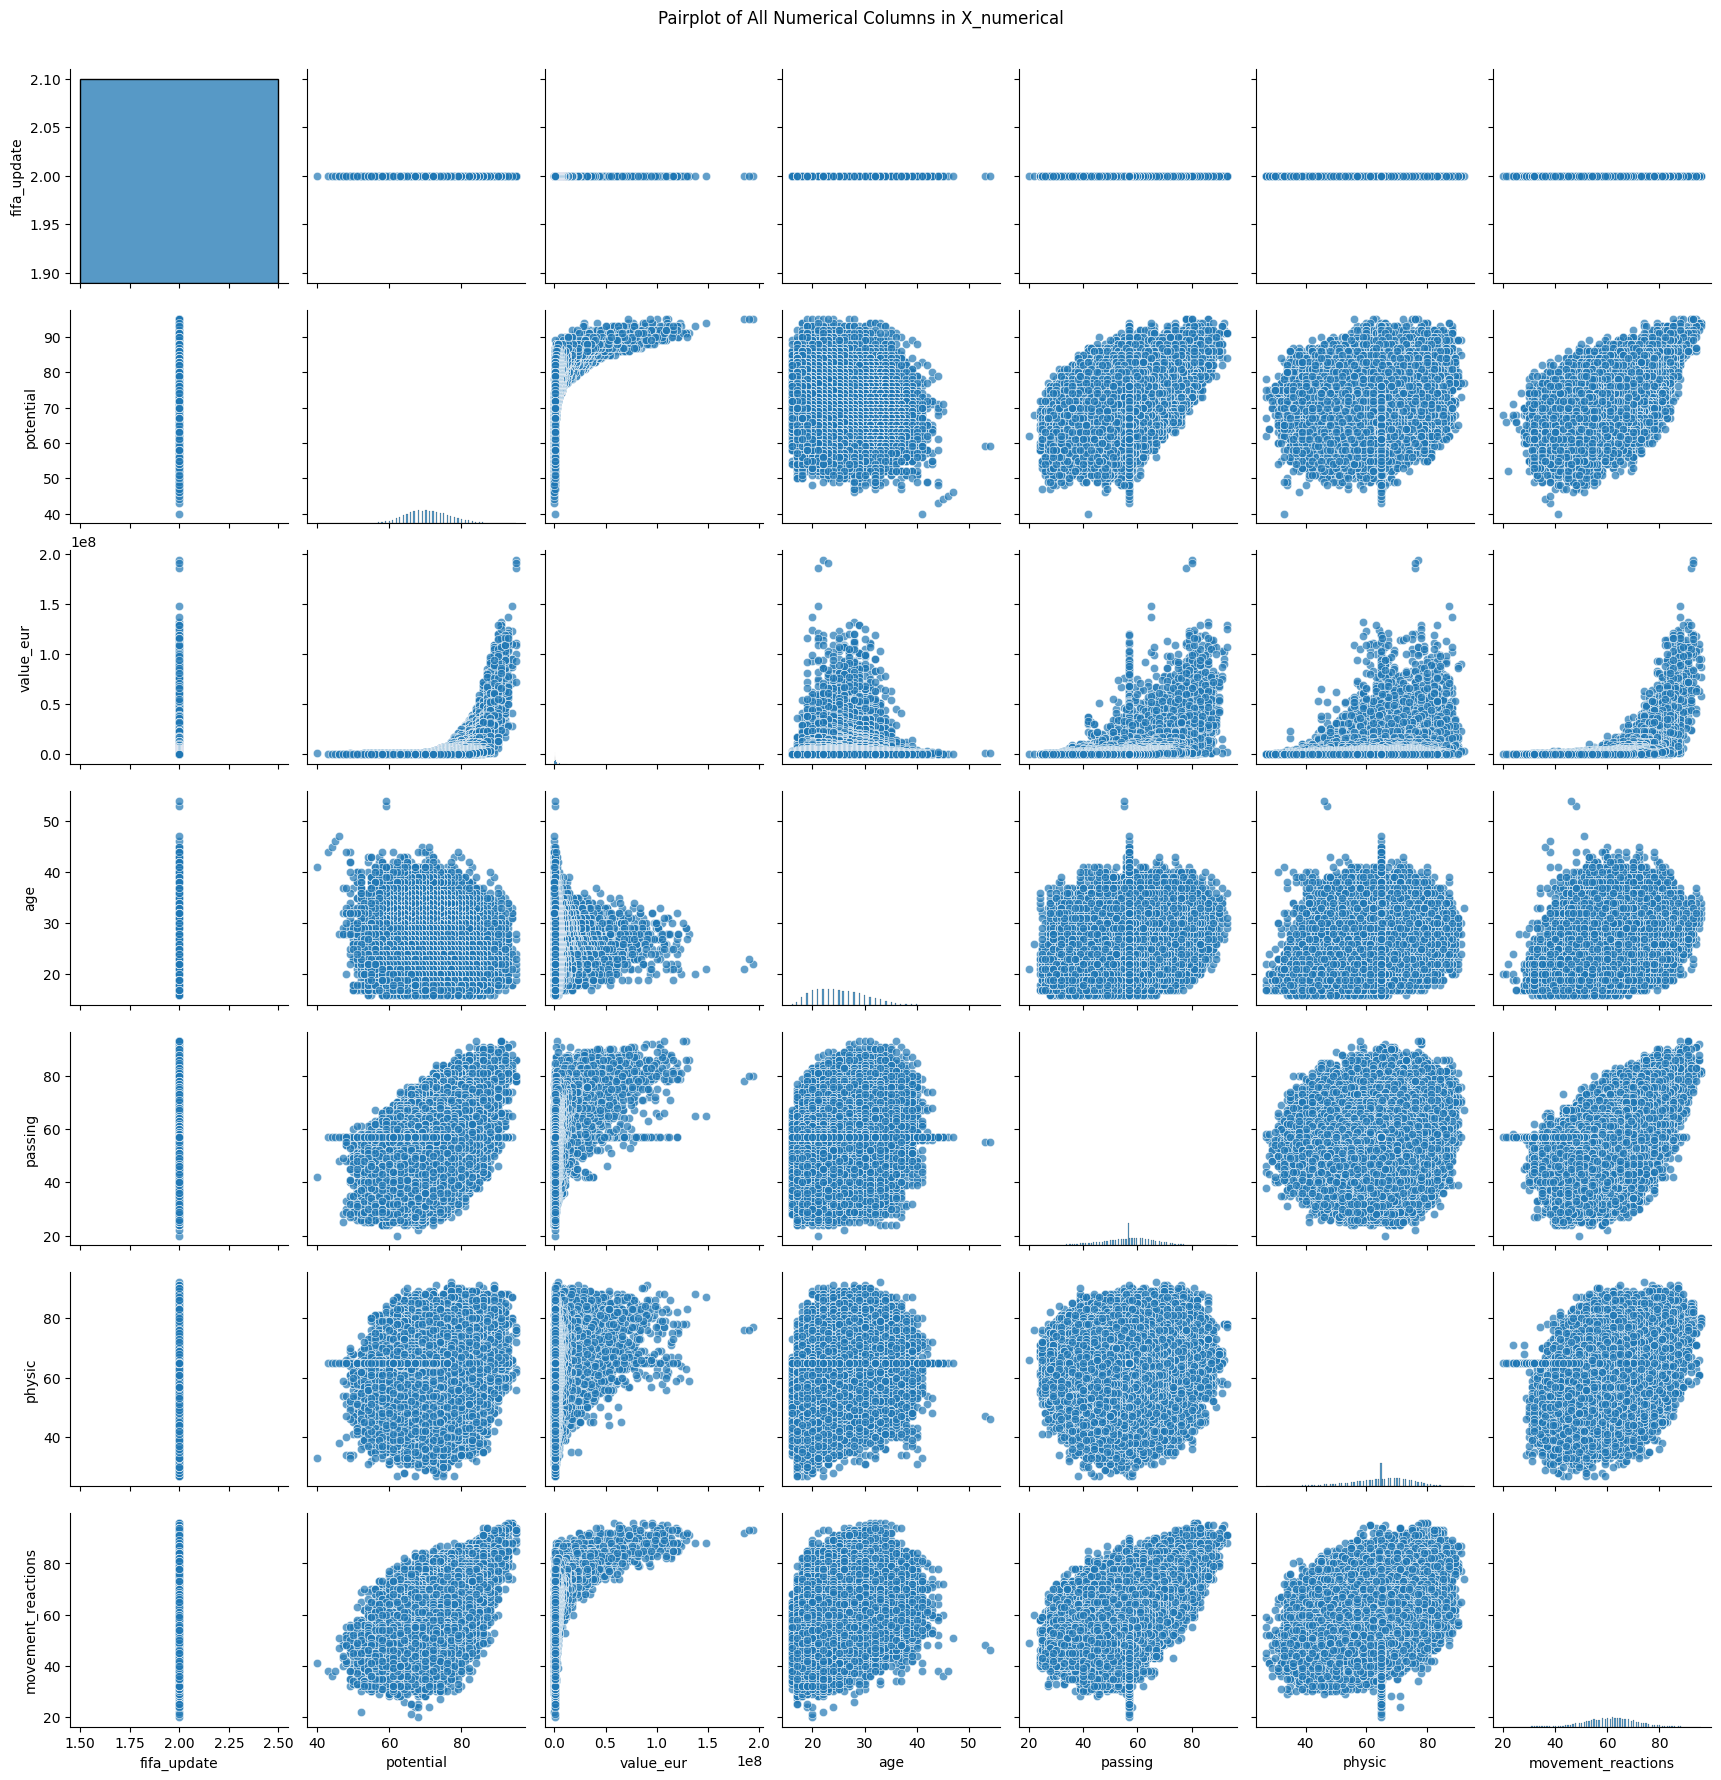

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for all numerical columns in X_numerical
sns.pairplot(X_numerical, diag_kind='hist', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of All Numerical Columns in X_numerical', y=1.02)  # Adjust title position
plt.show()

In [62]:

# Convert combined data to sparse format
combined_data_sparse = combined_data.astype(pd.SparseDtype("float", 0))
combined_data_sparse
# Drop the specified columns
columns_to_drop = ['player_id', 'fifa_update','value_eur','preferred_foot']
combined_data_sparse = combined_data_sparse.drop(columns=columns_to_drop, errors='ignore')
combined_data_sparse

,potential,age,passing,physic,movement_reactions,Left,Right
0,95.0,27.0,86.000000,63.000000,94.0,1.0,0.0
1,92.0,29.0,81.000000,79.000000,90.0,0.0,1.0
2,90.0,30.0,83.000000,64.000000,89.0,1.0,0.0
3,90.0,32.0,81.000000,86.000000,85.0,0.0,1.0
4,90.0,28.0,56.938175,64.814364,89.0,0.0,1.0
...,...,...,...,...,...,...,...
161578,61.0,18.0,40.000000,44.000000,39.0,0.0,1.0
161579,58.0,19.0,29.000000,57.000000,42.0,1.0,0.0
161580,58.0,19.0,43.000000,53.000000,50.0,0.0,1.0
161581,70.0,17.0,36.000000,42.000000,45.0,0.0,1.0


In [63]:
print(y_numerical)

0         93.0
1         92.0
2         90.0
3         90.0
4         90.0
          ... 
161578    46.0
161579    46.0
161580    46.0
161581    46.0
161582    46.0
Name: overall, Length: 161583, dtype: float64


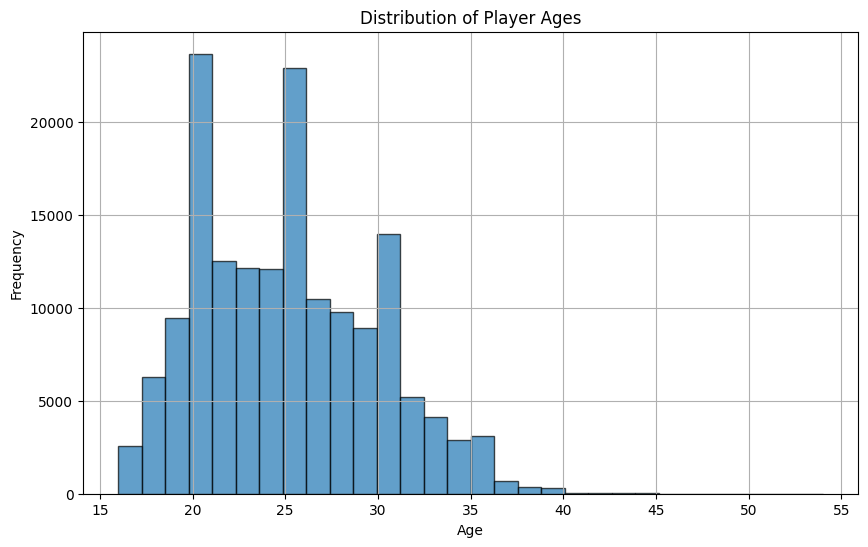

In [64]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(combined_data_sparse['age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


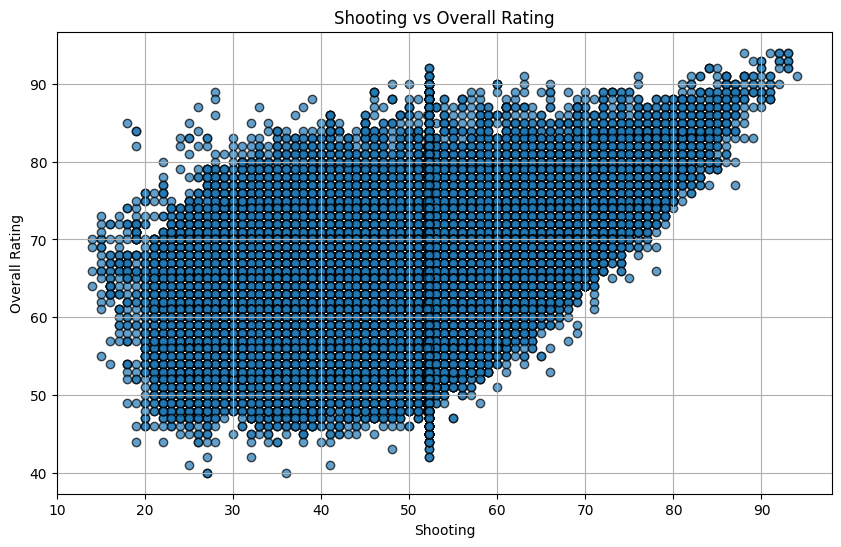

In [98]:
import matplotlib.pyplot as plt

# Scatter plot for 'shooting' vs 'overall'
plt.figure(figsize=(10, 6))
plt.scatter(data['shooting'], data['overall'], alpha=0.7, edgecolor='k')
plt.title('Shooting vs Overall Rating')
plt.xlabel('Shooting')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


In [99]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# step 15 Convert to scipy sparse matrix

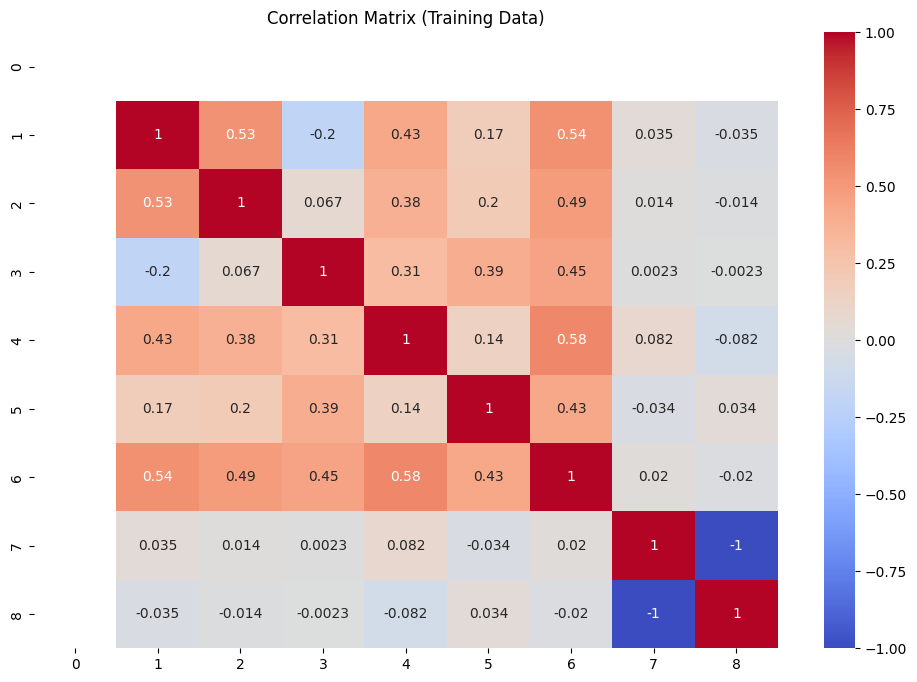

In [100]:
# Convert to scipy sparse matrix
from scipy.sparse import csr_matrix
combined_data_sparse_matrix = csr_matrix(combined_data_sparse.sparse.to_coo())

# Standardize features
scaler = StandardScaler(with_mean=False)  # with_mean=False is required for sparse data
X_scaled = scaler.fit_transform(combined_data_sparse_matrix)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numerical, test_size=0.2, random_state=42)

# Data Visualization: Correlation matrix of the training set after removing highly and weakly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_train.toarray()).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Training Data)')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


step 16 Initialize models

In [69]:

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

In [102]:
import pickle as pkl
import joblib


step 17:The train_and_evaluate_model function automates the process of training and evaluating machine learning models, facilitating model selection and hyperparameter tuning. It constructs a pipeline that includes data scaling and a specified regression model. Depending on the model_name provided (e.g., 'RandomForest' or 'GradientBoosting'), the function defines a grid of hyperparameters to search over using GridSearchCV, a methodical search technique. This grid includes parameters such as number of estimators, maximum depth, and minimum samples per split, tailored to each model type to optimize performance. The function performs cross-validation to evaluate models based on mean squared error (MSE) and mean absolute error (MAE). After identifying the best estimator based on cross-validation results, it trains this estimator on the training data, evaluates its performance on test data, and stores the trained model for future use. This streamlined approach ensures robust model training and selection, enhancing predictive accuracy and enabling informed decision-making in machine learning applications.

In [103]:
from sklearn.model_selection import GridSearchCV

def train_and_evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('scaler', scaler),
        ('regressor', model)
    ])

    # Define parameter grid based on the model
    if model_name == 'RandomForest':
        param_grid = {
            'regressor__n_estimators': [100, 200, 300],
            'regressor__max_depth': [None, 10, 20, 30],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4],
            'regressor__bootstrap': [True, False]
        }
    elif model_name == 'GradientBoosting':
        param_grid = {
            'regressor__n_estimators': [100, 200, 300],
            'regressor__learning_rate': [0.01, 0.1, 0.2],
            'regressor__max_depth': [3, 5, 7],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4],
            'regressor__subsample': [0.8, 0.9, 1.0]
        }
    else:
        param_grid = {}

    # Use GridSearchCV for exhaustive search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    cv_rmse = np.sqrt(-grid_search.best_score_)
    cv_mae = -cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()

    print(f"{model_name} CV RMSE: {cv_rmse}, CV MAE: {cv_mae}")

    best_estimator.fit(X_train, y_train)
    y_pred = best_estimator.predict(X_test)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Test RMSE: {test_rmse}")
    print(f"{model_name} Test MAE: {test_mae}")
    print(f"{model_name} Test R^2: {test_r2}")

    joblib.dump(best_estimator, f'/content/drive/My Drive/{model_name}.pkl')

    return best_estimator, test_rmse, test_mae


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

 Training  and evaluate models

In [ ]:
# Train and evaluate models
models = {'LinearRegression': lr, 'RandomForest': rf, 'GradientBoosting': gb}
best_model = None
best_rmse = float('inf')
best_mae = float('inf')

for model_name, model in models.items():
    trained_model, test_rmse, test_mae = train_and_evaluate_model(model, model_name)
    if test_rmse < best_rmse:
        best_model = trained_model
        best_rmse = test_rmse
        best_mae = test_mae

print(f"Best model: {best_model}")
print(f"Best model RMSE: {best_rmse}")
print(f"Best model MAE: {best_mae}")

NameError: name 'lr' is not defined

**Testing result explanation**

The training and evaluation of various machine learning models, including Linear Regression, Random Forest, and Gradient Boosting, demonstrated that Gradient Boosting achieved superior performance. With a Cross-Validation RMSE of 1.4189, Test RMSE of 1.4154, and an R^2 score of 0.9596, the Gradient Boosting model outperformed the others, indicating its robust predictive accuracy and effectiveness. Despite minor differences in MAE, Gradient Boosting consistently showed the best results, making it the optimal choice for our predictive tasks. This success underscores the model's capacity to generalize well to new, unseen data, affirming its suitability for deployment.

**new data testing step 1 for testing new data :Testing code with the totally new data of players 2022 that the machine did not see at all.**





In [72]:

#Testing code with the totally new data of players 2022 that the machine did not see at all.
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from scipy.sparse import csr_matrix
import joblib

# Mount Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')





# Define file paths
test_file_path = '/content/drive/My Drive/players_22 (1).csv'
model_file_path = '/content/drive/My Drive/GradientBoosting.pkl'

# Load and display the data
print("Sample of the loaded data:")
test_data = pd.read_csv(test_file_path)
print(test_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sample of the loaded data:
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De 

<ipython-input-72-98b5632b250f>:22: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_file_path)




The preprocess_and_predict function automates the preprocessing and prediction of new data using a pre-trained machine learning model. It begins by separating numerical and categorical data from the input test_data, ensuring each subset is handled appropriately. Missing values in numerical data are imputed using either the median or mean strategy based on the distribution of each feature. Categorical data missing values are filled with the mode of each column. Categorical variables are then one-hot encoded to convert them into a numerical format suitable for modeling.


Function to preprocess and predict new data because we shall have efficiency in doing that


In [75]:

# Function to preprocess and predict new data
def preprocess_and_predict(test_data, model_file_path):
    # Separate numerical and categorical data
    numerical_cols = ['potential', 'age', 'shooting', 'passing', 'physic', 'movement_reactions']
    categorical_cols = ['preferred_foot']  # Add more if there are additional categorical columns

    numerical_data = test_data[numerical_cols].copy()  # Ensure a copy to avoid SettingWithCopyWarning
    categorical_data = test_data[categorical_cols].copy()  # Ensure a copy to avoid SettingWithCopyWarning

    # Impute missing values for numerical data
    for column in numerical_data.columns:
        imputer = SimpleImputer(strategy='median') if numerical_data[column].median() < numerical_data[column].mean() else SimpleImputer(strategy='mean')
        numerical_data.loc[:, column] = imputer.fit_transform(numerical_data[[column]])

    # Handle missing values for categorical data
    for column in categorical_data.columns:
        categorical_data.loc[:, column].fillna(categorical_data[column].mode()[0], inplace=True)

    # One-hot encode categorical data
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    categorical_data_encoded = encoder.fit_transform(categorical_data)

    # Get feature names after one-hot encoding
    categorical_feature_names = encoder.categories_[0].tolist()
    categorical_data_encoded = pd.DataFrame(categorical_data_encoded, columns=categorical_feature_names)

    # Combine numerical and encoded categorical data
    combined_data = pd.concat([numerical_data, categorical_data_encoded], axis=1)

    # Remove highly correlated features (if any)
    def correlation(X_numerical, threshold):
        col_corr = set()
        corr_matrix = pd.DataFrame(X_numerical).corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
        return col_corr

    cor_features = correlation(combined_data, 0.7)
    combined_data.drop(columns=cor_features, inplace=True, errors='ignore')

    # Standardize features
    scaler = StandardScaler(with_mean=False)  # with_mean=False is required for sparse data
    combined_data_sparse = combined_data.astype(pd.SparseDtype("float", 0))
    X_scaled = scaler.fit_transform(combined_data_sparse)

    # Load the model
    model_loaded = joblib.load(model_file_path)

    # Make predictions
    predictions = model_loaded.predict(X_scaled)

    return predictions

# Call the function and get predictions
predictions = preprocess_and_predict(test_data, model_file_path)

# Display the predictions
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[86.38018729 89.63137889 86.98644609 ... 50.04381081 49.98429445
 49.50736436]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
